In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
#load the dataset
df=pd.read_csv('./OnlineRetail.csv/OnlineRetail.csv',encoding='latin1')
df.shape #knowing the dimensions of the dataset

(541909, 8)

In [4]:
#data preprocessing
print(df.info())
print('Null count',df.isnull().sum())
print("Duplicates ",df.duplicated().sum())
print("unique values of every attribute/feature")
for col in df.select_dtypes(include=['object','int64','float']):
  print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
Null count InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Duplicates  5268
unique values of every attribute/feature
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
581483        1
581566      

In [5]:
#removing null values
df.dropna(subset=['Description','CustomerID'],inplace=True)

#removing duplicate rows
df.drop_duplicates(inplace=True)

#dropping irrelevant features
df.drop(columns=['StockCode','Description'],inplace=True)

df.reset_index(drop=True,inplace=True)

In [15]:
print("revised dataset shape",df.shape)
df['TotalPrice']=df['Quantity']*df['UnitPrice']
#converting object datatypt to datetime datatype
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

current_date=df['InvoiceDate'].max()+pd.Timedelta(days=2)
print(current_date)

revised dataset shape (401604, 8)
2011-12-11 12:50:00


In [16]:
#creating new dataset with features like Recency,Frequency,Monetary
df['Recency']=current_date-df['InvoiceDate']
new_df=df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(current_date-x.max()).days,
    'InvoiceNo':'nunique',
    'TotalPrice':'sum'
})
new_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'frequency','TotalPrice':'monetry'},inplace=True)
print("New dataset shape",new_df.shape)

New dataset shape (4372, 3)


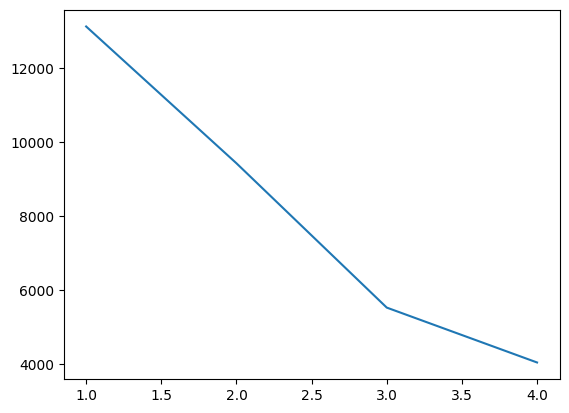

In [17]:
#Actual Kmeans Model building
scaler=StandardScaler()#Normalizing the data
x=scaler.fit_transform(new_df)

wcss=[]
high=5
for i in range(1,high):
  km=KMeans(n_clusters=i)
  km.fit_predict(x)
  wcss.append(km.inertia_)

plt.plot(range(1,high),wcss)#finding best k by plotting within cluster sum of squares(wcss)

In [18]:
#preparing model with 4 clusters
kmeans=KMeans(n_clusters=4,random_state=42)
new_df['Cluster']=kmeans.fit_predict(x)

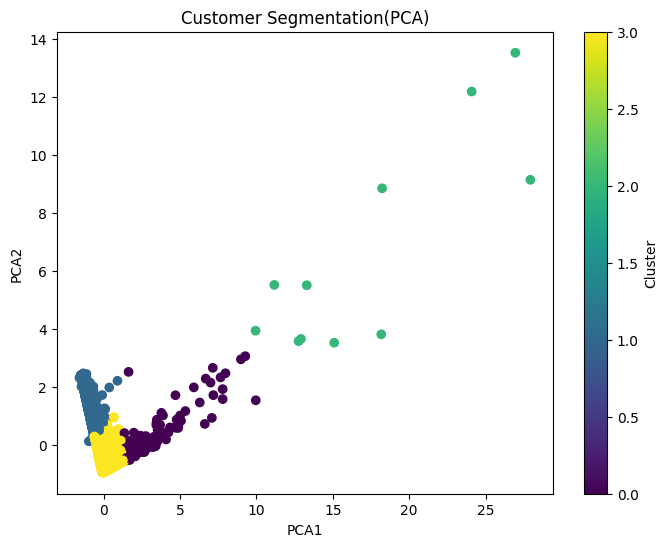

In [19]:
#visulaizing the model with 2 best features 
pca=PCA(2)
x_pca=pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=new_df['Cluster'],cmap='viridis')
plt.title('Customer Segmentation(PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()